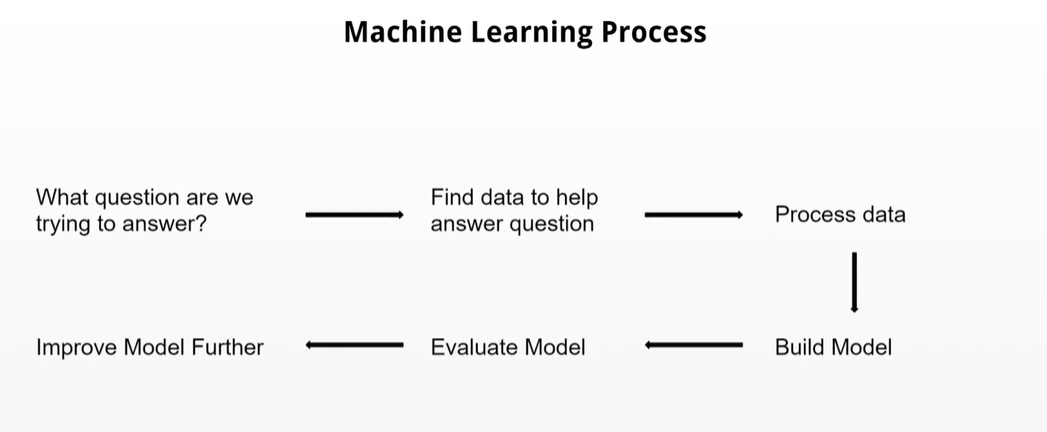

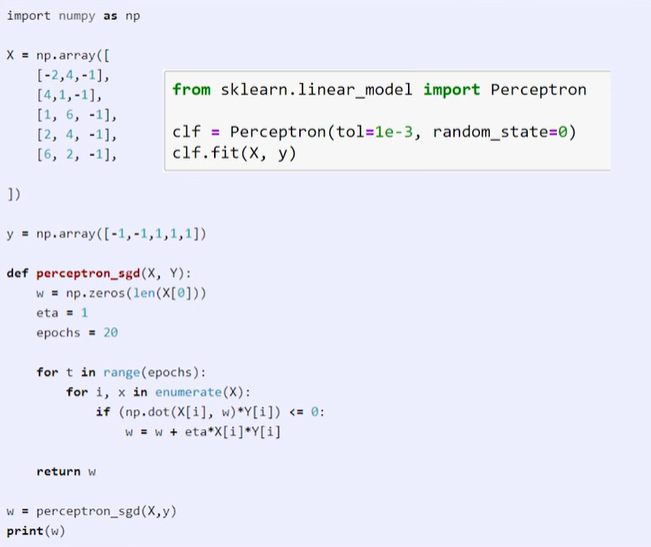

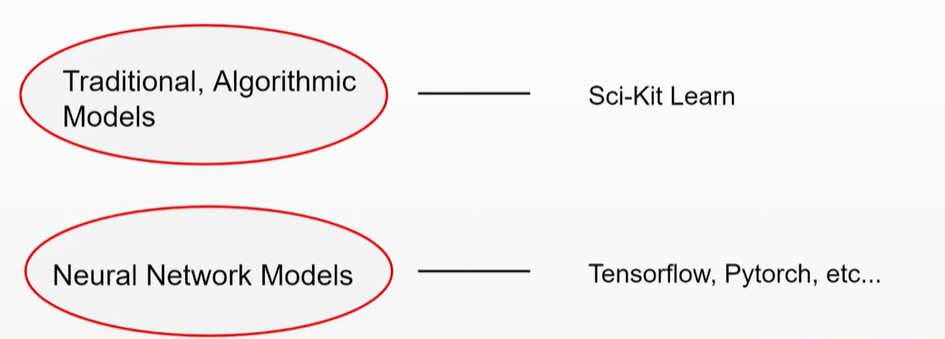

In [1]:
import json # Process file

file_name = 'B:\Project\SKlearn\Books_small.json'

# open a example
with open(file_name) as f:
    for line in f:
        print(line)
        
        break

{"reviewerID": "A1E5ZR1Z4OQJG", "asin": "1495329321", "reviewerName": "Pure Jonel \"Pure Jonel\"", "helpful": [0, 0], "reviewText": "Da Silva takes the divine by storm with this unique new novel.  She develops a world unlike any others while keeping it firmly in the real world.  This is a very well written and entertaining novel.  I was quite impressed and intrigued by the way that this solid storyline was developed, bringing the readers right into the world of the story.  I was engaged throughout and definitely enjoyed my time spent reading it.I loved the character development in this novel.  Da Silva creates a cast of high school students who actually act like high school students.  I really appreciated the fact that none of them were thrown into situations far beyond their years, nor did they deal with events as if they had decades of life experience under their belts.  It was very refreshing and added to the realism and impact of the novel.  The friendships between the characters i

In [2]:
# get review and overall
# to convert string to dictinoary and get data use json()
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        print(review['reviewText'])
        print(review['overall'])
        break

Da Silva takes the divine by storm with this unique new novel.  She develops a world unlike any others while keeping it firmly in the real world.  This is a very well written and entertaining novel.  I was quite impressed and intrigued by the way that this solid storyline was developed, bringing the readers right into the world of the story.  I was engaged throughout and definitely enjoyed my time spent reading it.I loved the character development in this novel.  Da Silva creates a cast of high school students who actually act like high school students.  I really appreciated the fact that none of them were thrown into situations far beyond their years, nor did they deal with events as if they had decades of life experience under their belts.  It was very refreshing and added to the realism and impact of the novel.  The friendships between the characters in this novel were also truly touching.Overall, this novel was fantastic.  I can&#8217;t wait to read more and to find out what happen

In [3]:
# get all
reviews = []

with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append((review['reviewText'], review['overall']))

print(reviews)
print(reviews[100])
print(reviews[100][1])


[('Da Silva takes the divine by storm with this unique new novel.  She develops a world unlike any others while keeping it firmly in the real world.  This is a very well written and entertaining novel.  I was quite impressed and intrigued by the way that this solid storyline was developed, bringing the readers right into the world of the story.  I was engaged throughout and definitely enjoyed my time spent reading it.I loved the character development in this novel.  Da Silva creates a cast of high school students who actually act like high school students.  I really appreciated the fact that none of them were thrown into situations far beyond their years, nor did they deal with events as if they had decades of life experience under their belts.  It was very refreshing and added to the realism and impact of the novel.  The friendships between the characters in this novel were also truly touching.Overall, this novel was fantastic.  I can&#8217;t wait to read more and to find out what hap

In [4]:
#use class for claen messy code 
class Review():
    def __init__(self, text, score):
        self.text = text
        self.score = score
        

In [5]:
reviews = []

with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))

In [6]:
reviews[0].score

4.0

In [7]:
class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()

    def get_sentiment(self):

        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE


In [8]:
reviews = []

with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))

In [9]:
reviews[0].sentiment

'POSITIVE'

Machine learning love numerical data and matrics data. so we use method to convert text to numerical data. we use bag of  word. we use bag of words

Bag of words

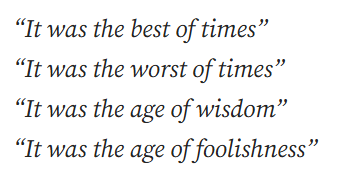

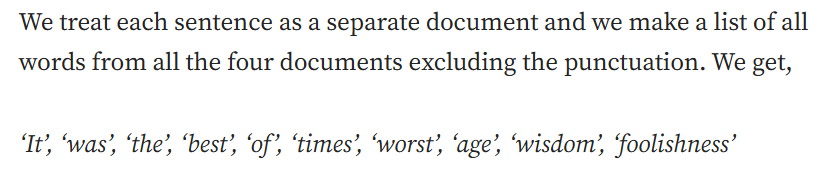

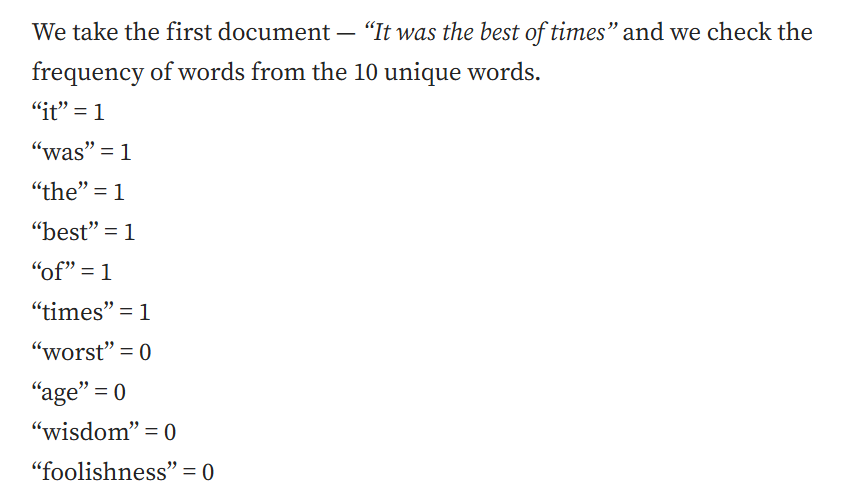

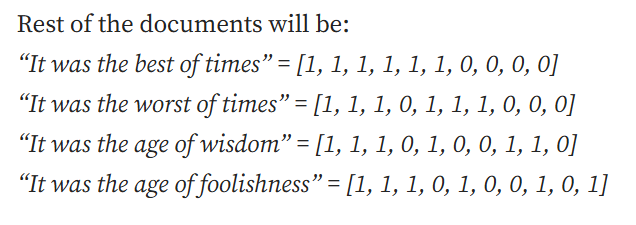

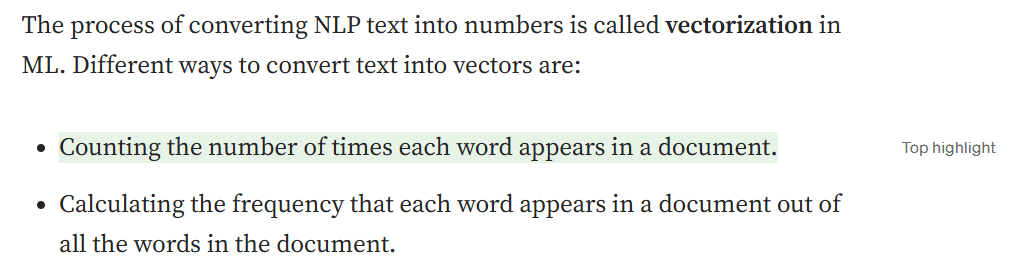

# Prep Data

In [10]:
import sklearn

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews, test_size = 0.33, random_state=42)

In [12]:
len(train)

670

In [13]:
print(train[0].score)

5.0


In [14]:
len(test)

330

X is text or feature and Y is label or category or Sentment

In [15]:
train_x = [x.text for x in train]
train_y = [y.sentiment for y in train]

test_x = [x.text for x in test]
test_y = [y.sentiment for y in test ]
test_x[0]
test_y[0]

'POSITIVE'

# Bag of words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)
print(train_x[0])
print(train_x_vectors[0])
print(train_x_vectors[0].toarray())

Vivid characters and descriptions. The author has created a tale that grabs your attention and I couldn't put it down.
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 17 stored elements and shape (1, 7372)>
  Coords	Values
  (0, 7086)	1
  (0, 1148)	1
  (0, 350)	2
  (0, 1800)	1
  (0, 6595)	1
  (0, 562)	1
  (0, 3054)	1
  (0, 1558)	1
  (0, 6475)	1
  (0, 6593)	1
  (0, 2895)	1
  (0, 7353)	1
  (0, 539)	1
  (0, 1515)	1
  (0, 5197)	1
  (0, 3545)	1
  (0, 2007)	1
[[0 0 0 ... 0 0 0]]


# Classification

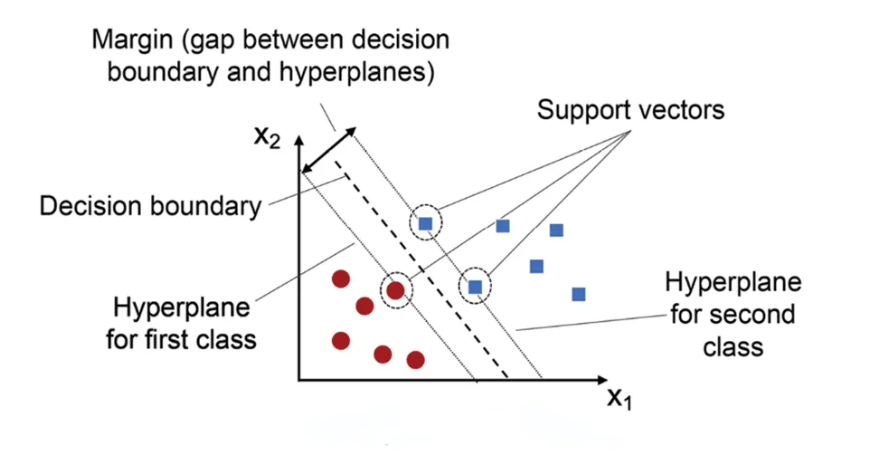

In [17]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

test_x[0]

clf_svm.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

Evalution

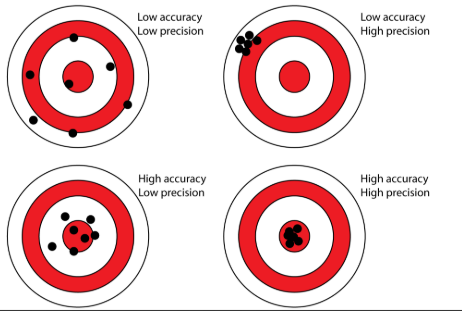

In [19]:
# Mean Accuracy
print(clf_svm.score(test_x_vectors, test_y))

0.8242424242424242


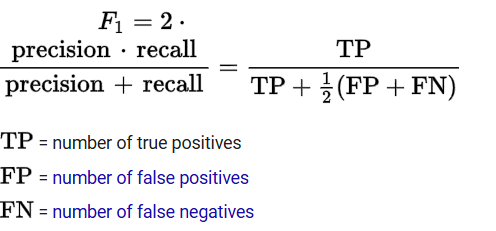

In [20]:
# F1 Scores
from sklearn.metrics import f1_score

f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])

array([0.91319444, 0.22222222])

In [21]:
test_set = ['very fun', "bad book do not buy", 'horrible waste of time']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)

array(['POSITIVE', 'POSITIVE', 'POSITIVE'], dtype='<U8')

In [38]:
import random

class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
        
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)

In [39]:
import json



reviews = []
with open(file_name) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))
        
reviews[5].text

'Love the book, great story line, keeps you entertained.for a first novel from this author she did a great job,  Would definitely recommend!'

In [40]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews, test_size=0.33, random_state=42)

train_container = ReviewContainer(training)

test_container = ReviewContainer(test)

In [41]:
train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

47
47


In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# This book is great !
# This book was so bad

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[0])
print(train_x_vectors[0].toarray())

I absolutely loved this book!  I don't give many books 5 stars, most that I enjoy get 4 stars, but this one I thought was worth it.  I've been waiting for Lynsay to get back to the long running plot line of Leonius Livius II.  Within 5 minutes you were rooting for Basha (Devine) and I for one really liked her.  Most immortals of her age don't know anything about the mortal world anymore, Basha is the exact opposite.  I must admit I was waiting for her confrontation with Lucian for the entire book and that did not disappoint.  You feel for everyone in that circumstance.  My only suggestion is that I would have added one more chapter to the end of the book after they got home.  I guess we'll have to wait til the next book to see them living happily ever after. :)
[[0. 0. 0. ... 0. 0. 0.]]


In [43]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)





SVC(kernel='linear')

In [44]:
test_set = ['very fun', "bad book do not buy", 'horrible waste of time']
new_test = vectorizer.transform(test_set)

clf_svm.predict(new_test)

array(['POSITIVE', 'NEGATIVE', 'NEGATIVE'], dtype='<U8')

In [45]:
# Mean Accuracy
print(clf_svm.score(test_x_vectors, test_y))

0.7


In [46]:
# F1 Scores
from sklearn.metrics import f1_score

f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])

array([0.70967742, 0.68965517])

In [47]:
clf_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

A solution to over-fitting problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

A model is trained using  of the folds as training data;

the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.
![alt text](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [48]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x_vectors, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [49]:
print("Best Parameters:", clf.best_params_)

Best Parameters: {'C': 4, 'kernel': 'linear'}


In [50]:
print(clf.score(test_x_vectors, test_y))

0.8


In [59]:
f1_score(test_y, clf.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE])

array([0.8, 0.8])

In [55]:
print(test_x[2])

clf.predict(test_x_vectors[2])

Michael Cunningham mesmerizes with the thoughtful, elegant prose that is this book.  The reader becomes so close to its characters...the reader feels what these brothers feel.  Beautiful and tragic...a book that will stay with me for a long, long time.  Thank you again, Mr. Cunningham.  The Hours remains at the top of my list and The Snow Queen is another gift to your readers.


array(['POSITIVE'], dtype='<U8')

In [56]:
print(test_y[2])

POSITIVE
